In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import requests
import os

api_key = os.getenv("MASSIVE_API_KEY")

url = f"https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/2025-11-22/2026-02-22?adjusted=true&sort=asc&limit=1200&apiKey={api_key}"# Daha önce bulduğunuz URL
api_data = requests.get(url).json()
api_data

{'ticker': 'AAPL',
 'queryCount': 60,
 'resultsCount': 60,
 'adjusted': True,
 'results': [{'v': 65585796.0,
   'vw': 275.314,
   'o': 270.9,
   'c': 275.92,
   'h': 277,
   'l': 270.9,
   't': 1763960400000,
   'n': 755844},
  {'v': 46914220.0,
   'vw': 277.9967,
   'o': 275.27,
   'c': 276.97,
   'h': 280.38,
   'l': 275.25,
   't': 1764046800000,
   'n': 667295},
  {'v': 33431423.0,
   'vw': 278.0466,
   'o': 276.96,
   'c': 277.55,
   'h': 279.53,
   'l': 276.63,
   't': 1764133200000,
   'n': 538937},
  {'v': 20135620.0,
   'vw': 277.6285,
   'o': 277.26,
   'c': 278.85,
   'h': 279,
   'l': 275.9865,
   't': 1764306000000,
   'n': 369623},
  {'v': 46587722.0,
   'vw': 281.0702,
   'o': 278.01,
   'c': 283.1,
   'h': 283.42,
   'l': 276.14,
   't': 1764565200000,
   'n': 644276},
  {'v': 53669532.0,
   'vw': 285.5944,
   'o': 283,
   'c': 286.19,
   'h': 287.4,
   'l': 282.6301,
   't': 1764651600000,
   'n': 682387},
  {'v': 43538687.0,
   'vw': 285.5333,
   'o': 286.2,
   'c': 2

In [11]:
apple_df = pd.DataFrame(api_data["results"])

In [12]:
apple_df.head(5)

,v,vw,o,c,h,l,t,n
0,65585796.0,275.3140,270.90,275.92,277.00,270.9000,1763960400000,755844
1,46914220.0,277.9967,275.27,276.97,280.38,275.2500,1764046800000,667295
2,33431423.0,278.0466,276.96,277.55,279.53,276.6300,1764133200000,538937
3,20135620.0,277.6285,277.26,278.85,279.00,275.9865,1764306000000,369623
4,46587722.0,281.0702,278.01,283.10,283.42,276.1400,1764565200000,644276


In [13]:
# convert the time from unix time to date time
apple_df["t"] = pd.to_datetime(apple_df["t"], origin="unix", unit="ms")
apple_df.rename(columns={"v" : "trading_volume",
                         "vw" : "volume_weighted_avg_price",
                         "o" : "open",
                         "c" : "close",
                         "h" : "high",
                         "l" : "low",
                         "t" : "date",
                         "n" : "no_transactions"}, inplace=True)
apple_df.head()

,trading_volume,volume_weighted_avg_price,open,close,high,low,date,no_transactions
0,65585796.0,275.3140,270.90,275.92,277.00,270.9000,2025-11-24 05:00:00,755844
1,46914220.0,277.9967,275.27,276.97,280.38,275.2500,2025-11-25 05:00:00,667295
2,33431423.0,278.0466,276.96,277.55,279.53,276.6300,2025-11-26 05:00:00,538937
3,20135620.0,277.6285,277.26,278.85,279.00,275.9865,2025-11-28 05:00:00,369623
4,46587722.0,281.0702,278.01,283.10,283.42,276.1400,2025-12-01 05:00:00,644276


In [14]:
apple_df.set_index("date", inplace=True)
apple_df.head()

,trading_volume,volume_weighted_avg_price,open,close,high,low,no_transactions
date,,,,,,,
2025-11-24 05:00:00,65585796.0,275.3140,270.90,275.92,277.00,270.9000,755844
2025-11-25 05:00:00,46914220.0,277.9967,275.27,276.97,280.38,275.2500,667295
2025-11-26 05:00:00,33431423.0,278.0466,276.96,277.55,279.53,276.6300,538937
2025-11-28 05:00:00,20135620.0,277.6285,277.26,278.85,279.00,275.9865,369623
2025-12-01 05:00:00,46587722.0,281.0702,278.01,283.10,283.42,276.1400,644276


<Axes: xlabel='date'>

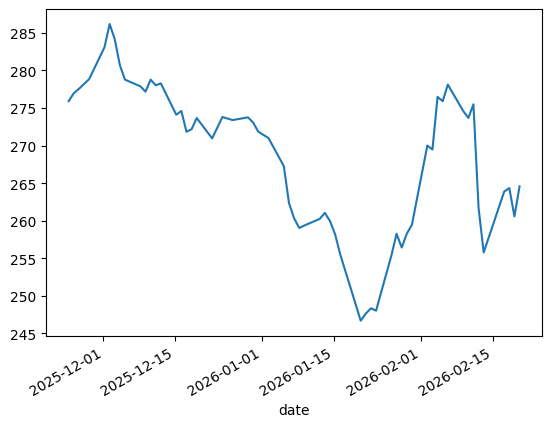

In [15]:
apple_df["close"].plot()

<Axes: xlabel='date'>

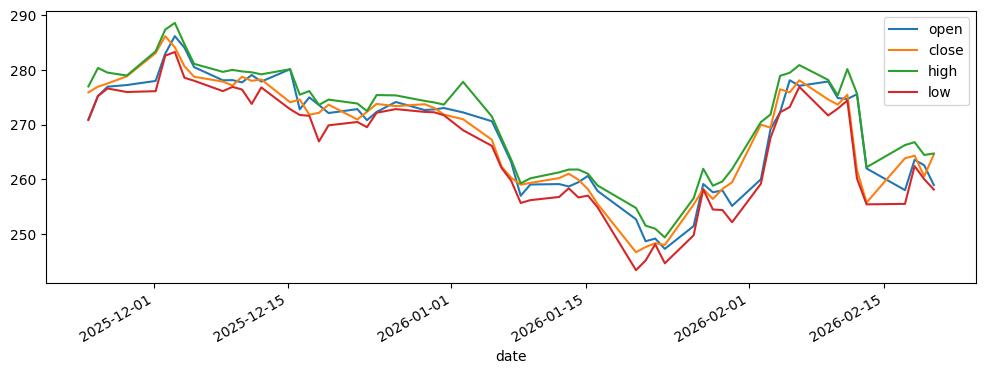

In [16]:
apple_df[["open", "close", "high", "low"]].plot(figsize=(12,4))

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/buseozgur/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/buseozgur/code/buseozgur/data-stock-market/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.56s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [19]:
#Amazon historical stock prices
url_amzn = f"https://api.massive.com/v2/aggs/ticker/AMZN/range/1/day/2026-01-03/2026-02-22?adjusted=true&sort=asc&limit=120&apiKey={api_key}"
api_amazon = requests.get(url_amzn).json()
api_amazon

{'ticker': 'AMZN',
 'queryCount': 33,
 'resultsCount': 33,
 'adjusted': True,
 'results': [{'v': 49733348.0,
   'vw': 232.1786,
   'o': 228.84,
   'c': 233.06,
   'h': 234,
   'l': 227.18,
   't': 1767589200000,
   'n': 678867},
  {'v': 53764677.0,
   'vw': 239.6475,
   'o': 232.1,
   'c': 240.93,
   'h': 243.18,
   'l': 232.07,
   't': 1767675600000,
   'n': 767759},
  {'v': 42236531.0,
   'vw': 242.9662,
   'o': 239.61,
   'c': 241.56,
   'h': 245.29,
   'l': 239.52,
   't': 1767762000000,
   'n': 623031},
  {'v': 39509844.0,
   'vw': 245.188,
   'o': 243.06,
   'c': 246.29,
   'h': 246.41,
   'l': 241.88,
   't': 1767848400000,
   'n': 537907},
  {'v': 34559961.0,
   'vw': 246.0666,
   'o': 244.568,
   'c': 247.38,
   'h': 247.86,
   'l': 242.24,
   't': 1767934800000,
   'n': 487691},
  {'v': 35867770.0,
   'vw': 247.2996,
   'o': 246.73,
   'c': 246.47,
   'h': 248.94,
   'l': 245.96,
   't': 1768194000000,
   'n': 520852},
  {'v': 38371778.0,
   'vw': 243.3866,
   'o': 246.53,
  

In [21]:
#Meta’nın (Facebook) market cap’i
url_meta = f"https://api.massive.com/v3/reference/tickers/META?apiKey={api_key}"
api_meta = requests.get(url_meta).json()
api_meta

{'request_id': 'de30325dc67d67e43247b7f97004a430',
 'results': {'ticker': 'META',
  'name': 'Meta Platforms, Inc. Class A Common Stock',
  'market': 'stocks',
  'locale': 'us',
  'primary_exchange': 'XNAS',
  'type': 'CS',
  'active': True,
  'currency_name': 'usd',
  'cik': '0001326801',
  'composite_figi': 'BBG000MM2P62',
  'share_class_figi': 'BBG001SQCQC5',
  'market_cap': 1658528335526.24,
  'phone_number': '650-543-4800',
  'address': {'address1': '1 META WAY',
   'city': 'MENLO PARK',
   'state': 'CA',
   'postal_code': '94025'},
  'description': 'Meta is the largest social media company in the world, boasting close to 4 billion monthly active users worldwide. The firm\'s "Family of Apps," its core business, consists of Facebook, Instagram, Messenger, and WhatsApp. End users can leverage these applications for a variety of different purposes, from keeping in touch with friends to following celebrities and running digital businesses for free. Meta packages customer data, gleaned 

In [25]:
#Apple’ın son 4 çeyreklik gross revenues bilgisi
url_apple_finance = f"https://api.massive.com/vX/reference/financials?ticker=AAPL&timeframe=quarterly&limit=4&apiKey={api_key}"
api_apple_finance = requests.get(url_apple_finance).json()
api_apple_finance

{'results': [{'start_date': '2025-09-28',
   'end_date': '2025-12-27',
   'filing_date': '2026-01-30',
   'acceptance_datetime': '2026-01-30T11:01:32Z',
   'timeframe': 'quarterly',
   'fiscal_period': 'Q1',
   'fiscal_year': '2026',
   'cik': '0000320193',
   'sic': '3571',
   'tickers': ['AAPL'],
   'company_name': 'Apple Inc.',
   'source_filing_url': 'https://api.polygon.io/v1/reference/sec/filings/0000320193-26-000006',
   'source_filing_file_url': 'http://api.polygon.io/v1/reference/sec/filings/0000320193-26-000006/files/aapl-20251227_htm.xml',
   'financials': {'balance_sheet': {'other_noncurrent_assets': {'value': 171034000000.0,
      'unit': 'USD',
      'label': 'Other Non-current Assets',
      'order': 350},
     'noncurrent_liabilities': {'value': 128740000000.0,
      'unit': 'USD',
      'label': 'Noncurrent Liabilities',
      'order': 800},
     'long_term_debt': {'value': 88500000000.0,
      'unit': 'USD',
      'label': 'Long-term Debt',
      'order': 810},
     '

In [26]:
#Tesla hakkında en güncel news item
url_tesla = f"https://api.massive.com/v2/reference/news?ticker=TSLA&limit=1&apiKey={api_key}"
api_tesla = requests.get(url_tesla).json()
api_tesla

{'results': [{'id': '5f8433e63f71c5768a6baeecb3bac2a3921bfb532bcce1e2151f6ae1011cb106',
   'publisher': {'name': 'The Motley Fool',
    'homepage_url': 'https://www.fool.com/',
    'logo_url': 'https://s3.massive.com/public/assets/news/logos/themotleyfool.svg',
    'favicon_url': 'https://s3.massive.com/public/assets/news/favicons/themotleyfool.ico'},
   'title': "Billionaire Stanley Druckenmiller Still Isn't Buying Nvidia. But He Recently Picked Up Shares of This AI Stock That's Among the Cheapest of the Magnificent Seven.",
   'author': 'Adria Cimino',
   'published_utc': '2026-02-22T17:15:00Z',
   'article_url': 'https://www.fool.com/investing/2026/02/22/billionaire-druckenmiller-didnt-buy-nvidia/?source=iedfolrf0000001',
   'tickers': ['NVDA',
    'GOOG',
    'GOOGL',
    'AMZN',
    'MSFT',
    'META',
    'AAPL',
    'TSLA'],
   'image_url': 'https://g.foolcdn.com/image/?url=https%3A%2F%2Fg.foolcdn.com%2Feditorial%2Fimages%2F857148%2Fgettyimages-2078917109-1201x706-e21c547.jpg&w=